In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], yearfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Rename columns to match our analysis code
df.rename(columns={
    'InvoiceNo': 'InvoiceID',
    'Description': 'ProductName'
}, inplace=True)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (541909, 8)

Columns: ['InvoiceID', 'StockCode', 'ProductName', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

First few rows:


,InvoiceID,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Data Preprocessing
print("Data Info:")
print(df.info())
print("\nMissing Values Before:")
print(df.isnull().sum())

# Drop null values
df = df.dropna()

print("\nMissing Values After:")
print(df.isnull().sum())
print(f"\nDataset shape: {df.shape}")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"\nCountries ({df['Country'].nunique()}):")
print(df['Country'].value_counts())

wrong_data = df[df['Quantity'] <= 0].index
df.drop(wrong_data, inplace=True)
df.reset_index(inplace=True, drop=True)

print(f'\n Dataset Shape: {df.shape}')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceID    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   ProductName  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

Missing Values Before:
InvoiceID           0
StockCode           0
ProductName      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing Values After:
InvoiceID      0
StockCode      0
ProductName    0
Quant

In [7]:
df.head()

,InvoiceID,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Feature Engineering - Creating necessary features for all analyses

df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Date'] = df['InvoiceDate'].dt.date
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()


In [9]:
print("✓ Features engineered successfully!")
print(f"\nSample data:")
print(df[['InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice', 'TotalAmount']].head())

# ====================================================================================
# SECTION 1: DESCRIPTIVE ANALYSIS
# ====================================================================================
# Summarize main characteristics of the dataset

print("\n" + "="*80)
print("DESCRIPTIVE ANALYSIS - DATASET OVERVIEW")
print("="*80)

# Basic dataset statistics
print(f"\n📊 DATASET DIMENSIONS:")
print(f"   Total Records: {len(df):,}")
print(f"   Total Columns: {len(df.columns)}")
print(f"   Date Range: {df['InvoiceDate'].min().date()} to {df['InvoiceDate'].max().date()}")
print(f"   Unique Customers: {df['CustomerID'].nunique():,}")
print(f"   Unique Products: {df['ProductName'].nunique():,}")
print(f"   Unique Countries: {df['Country'].nunique()}")

# Sales summary
total_sales = df['TotalAmount'].sum()
avg_transaction_value = df['TotalAmount'].mean()

# Calculate average order value (per invoice)
invoice_totals = df.groupby('InvoiceID')['TotalAmount'].sum()
avg_order_value = invoice_totals.mean()

print(f"\n💰 SALES SUMMARY:")
print(f"   Total Sales Revenue: £{total_sales:,.2f}")
print(f"   Average Order Value: £{avg_order_value:.2f}")
print(f"   Average Transaction Value: £{avg_transaction_value:.2f}")
print(f"   Total Quantity Sold: {df['Quantity'].sum():,} units")
print(f"   Average Quantity per Item: {df['Quantity'].mean():.2f} units")

# Customer demographics
print(f"\n👥 CUSTOMER DEMOGRAPHICS:")
print(f"   Total Transactions: {df['InvoiceID'].nunique():,}")
print(f"   Avg Transactions per Customer: {df['InvoiceID'].nunique() / df['CustomerID'].nunique():.2f}")
print(f"   Price Range: £{df['UnitPrice'].min():.2f} - £{df['UnitPrice'].max():.2f}")

# Top countries
print(f"\n🌍 TOP 10 COUNTRIES BY SALES:")
top_countries = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
for idx, (country, value) in enumerate(top_countries.items(), 1):
    print(f"   {idx}. {country}: £{value:,.2f}")

print(f"\n✓ Descriptive Analysis Complete")

✓ Features engineered successfully!

Sample data:
          InvoiceDate  CustomerID  Quantity  UnitPrice  TotalAmount
0 2010-12-01 08:26:00     17850.0         6       2.55        15.30
1 2010-12-01 08:26:00     17850.0         6       3.39        20.34
2 2010-12-01 08:26:00     17850.0         8       2.75        22.00
3 2010-12-01 08:26:00     17850.0         6       3.39        20.34
4 2010-12-01 08:26:00     17850.0         6       3.39        20.34

DESCRIPTIVE ANALYSIS - DATASET OVERVIEW

📊 DATASET DIMENSIONS:
   Total Records: 397,924
   Total Columns: 14
   Date Range: 2010-12-01 to 2011-12-09
   Unique Customers: 4,339
   Unique Products: 3,877
   Unique Countries: 37

💰 SALES SUMMARY:
   Total Sales Revenue: £8,911,407.90
   Average Order Value: £480.76
   Average Transaction Value: £22.39
   Total Quantity Sold: 5,181,696 units
   Average Quantity per Item: 13.02 units

👥 CUSTOMER DEMOGRAPHICS:
   Total Transactions: 18,536
   Avg Transactions per Customer: 4.27
   Price Ran

In [10]:
# ====================================================================================
# SECTION 2: FEATURES FOR K-MEANS CUSTOMER SEGMENTATION
# ====================================================================================
# Best features to use:
# 1. RECENCY: Days since last purchase (how recently they bought)
# 2. FREQUENCY: Number of transactions (how often they buy)
# 3. MONETARY: Total amount spent (how much they spend)
# 4. COUNTRY: Geographic location for regional analysis
# 5. QUANTITY METRICS: Total and average quantities purchased
# These RFM metrics combined with additional features are industry standard for segmentation
# ====================================================================================

print("\n" + "="*80)
print("FEATURES FOR K-MEANS CUSTOMER SEGMENTATION")
print("="*80)
print("\nRFM Features:")
print("  • Recency: Days since last purchase")
print("  • Frequency: Number of transactions")
print("  • Monetary: Total amount spent")
print("\nAdditional Features:")
print("  • Country: Geographic location")
print("  • Quantity Metrics: Total and average purchase quantities")


FEATURES FOR K-MEANS CUSTOMER SEGMENTATION

RFM Features:
  • Recency: Days since last purchase
  • Frequency: Number of transactions
  • Monetary: Total amount spent

Additional Features:
  • Country: Geographic location
  • Quantity Metrics: Total and average purchase quantities


In [11]:
# STEP 1: EXTRACT RFM FEATURES FROM TRANSACTION DATA
# ========================================================

# Get the reference date (latest date in dataset + 1 day)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Reference date: {reference_date}")

# Group by CustomerID and calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceID': 'count',                                       # Frequency
    'TotalAmount': 'sum'                                        # Monetary
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print("\nRFM Features extracted:")
print(rfm.head(10))
print("\nRFM Statistics:")
print(rfm[['Recency', 'Frequency', 'Monetary']].describe())

Reference date: 2011-12-10 12:50:00

RFM Features extracted:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40
5     12352.0       36         85   2506.04
6     12353.0      204          4     89.00
7     12354.0      232         58   1079.40
8     12355.0      214         13    459.40
9     12356.0       23         59   2811.43

RFM Statistics:
           Recency    Frequency       Monetary
count  4339.000000  4339.000000    4339.000000
mean     92.518322    91.708689    2053.793018
std     100.009747   228.792852    8988.248381
min       1.000000     1.000000       0.000000
25%      18.000000    17.000000     307.245000
50%      51.000000    41.000000     674.450000
75%     142.000000   100.000000    1661.640000
max     374.000000  7847.000000  280206.020000


In [12]:
from sklearn.preprocessing import StandardScaler

# STEP 2: FEATURE SCALING
# =======================
# K-means is distance-based, so we need to scale features to same range
# This prevents features with large values from dominating

# Select features for clustering
X = rfm[['Recency', 'Frequency', 'Monetary']].copy()

# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled features for reference
X_scaled_df = pd.DataFrame(X_scaled, columns=['Recency', 'Frequency', 'Monetary'])
print("Scaled Features (first 10 rows):")
print(X_scaled_df.head(10))
print("\nScaled Features Statistics:")
print(X_scaled_df.describe())

Scaled Features (first 10 rows):
    Recency  Frequency  Monetary
0  2.334858  -0.396512  8.359634
1 -0.905199   0.394688  0.251046
2 -0.175186  -0.265374 -0.028546
3 -0.735196  -0.081781 -0.032963
4  2.174855  -0.326572 -0.191315
5 -0.565193  -0.029325  0.050321
6  1.114837  -0.383398 -0.218621
7  1.394842  -0.147350 -0.108420
8  1.214838  -0.344057 -0.177407
9 -0.695196  -0.142978  0.084302

Scaled Features Statistics:
            Recency     Frequency      Monetary
count  4.339000e+03  4.339000e+03  4.339000e+03
mean   7.532834e-17 -1.146301e-17 -4.093931e-17
std    1.000115e+00  1.000115e+00  1.000115e+00
min   -9.151995e-01 -3.965121e-01 -2.285239e-01
25%   -7.451965e-01 -3.265718e-01 -1.943370e-01
50%   -4.151906e-01 -2.216614e-01 -1.534784e-01
75%    4.948256e-01  3.624356e-02 -4.363455e-02
max    2.814867e+00  3.390047e+01  3.094978e+01


K=2, Inertia=8998.52
K=3, Inertia=5452.65
K=4, Inertia=4000.19
K=5, Inertia=2958.04
K=6, Inertia=2371.04
K=7, Inertia=1923.21
K=8, Inertia=1701.08
K=9, Inertia=1478.97
K=10, Inertia=1316.44


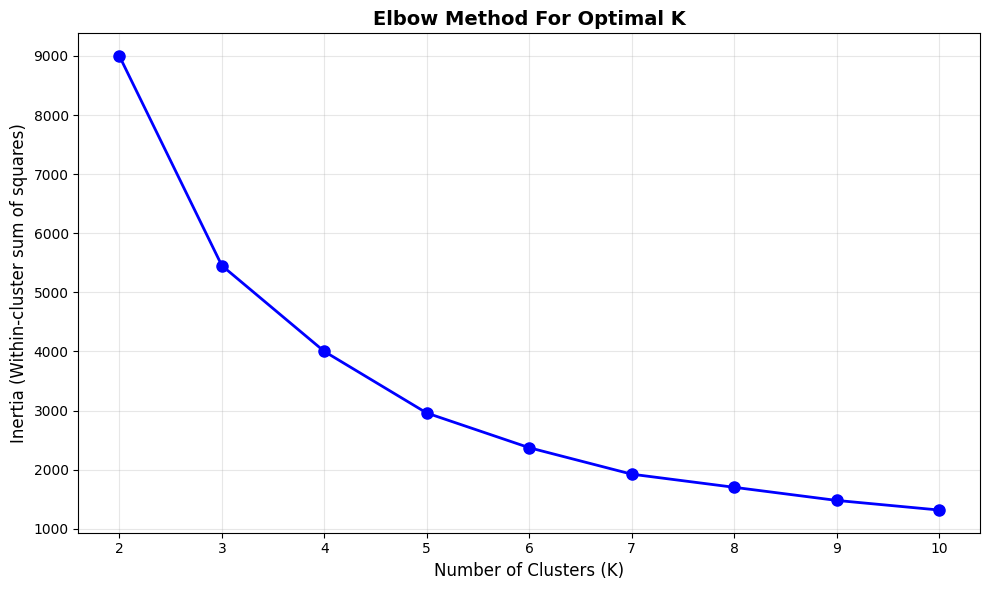


The 'elbow point' (where inertia starts to decline slowly) indicates the optimal K


In [13]:
from sklearn.cluster import KMeans

# STEP 3: FIND OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD
# ============================================================
# This method helps identify the best K value

# Calculate inertia for different K values
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_:.2f}")

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("\nThe 'elbow point' (where inertia starts to decline slowly) indicates the optimal K")

In [ ]:
# import joblib

# STEP 5: APPLY K-MEANS CLUSTERING WITH OPTIMAL K (FROM ELBOW METHOD)
# ====================================================================
# Using optimal_k determined from the elbow method analysis above

# You can adjust this value based on your visual inspection of the elbow curve
# Common choices: 3, 4, or 5
optimal_k = 4  # Using the suggested K from elbow method
# Alternative: Manually set optimal_k = 4 if you prefer a different value

print(f"\n{'='*60}")
print(f"K-MEANS CLUSTERING RESULTS (K={optimal_k})")
print(f"{'='*60}")
print(f"Using K={optimal_k} based on Elbow Method")
print(f"(You can adjust this value if needed)\n")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans_final.fit_predict(X_scaled)

# exporting scaler and kmeans model for predicting cluster through web app
# joblib.dump(kmeans_final, 'cloth_kmeans_model.pkl')
# joblib.dump(scaler, 'cloth_scaler.pkl')

print(f"\nNumber of customers in each cluster:")
print(rfm['Cluster'].value_counts().sort_index())

# Analyze cluster characteristics
print(f"\n{'='*60}")
print("CLUSTER CHARACTERISTICS (Original Scale)")
print(f"{'='*60}")

cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'median', 'std'])
print(cluster_summary)

# More detailed summary
print(f"\n{'='*60}")
print("DETAILED CLUSTER ANALYSIS")
print(f"{'='*60}")

for cluster_id in sorted(rfm['Cluster'].unique()):
    cluster_data = rfm[rfm['Cluster'] == cluster_id]
    print(f"\n📊 CLUSTER {cluster_id}:")
    print(f"   Size: {len(cluster_data)} customers ({len(cluster_data)/len(rfm)*100:.1f}%)")
    print(f"   Recency (days): {cluster_data['Recency'].mean():.1f} avg, {cluster_data['Recency'].min():.0f}-{cluster_data['Recency'].max():.0f} range")
    print(f"   Frequency: {cluster_data['Frequency'].mean():.1f} avg purchases")
    print(f"   Monetary: £{cluster_data['Monetary'].mean():.2f} avg spent, £{cluster_data['Monetary'].min():.2f}-£{cluster_data['Monetary'].max():.2f} range")


K-MEANS CLUSTERING RESULTS (K=4)
Using K=4 based on Elbow Method
(You can adjust this value if needed)


Number of customers in each cluster:
Cluster
0    3250
1    1078
2       4
3       7
Name: count, dtype: int64

CLUSTER CHARACTERISTICS (Original Scale)
            Recency                      Frequency                       \
               mean median        std         mean  median          std   
Cluster                                                                   
0         41.409231   30.0  35.641186   104.290769    57.0   154.190966   
1        247.495362  243.0  66.732712    27.660482    18.0    31.631815   
2          2.000000    1.5   1.414214  5807.750000  5394.0  1429.386203   
3          7.000000    3.0   8.286535   847.142857   716.0   707.366814   

              Monetary                            
                  mean      median           std  
Cluster                                           
0          2063.152936     922.255   4541.882397  
1          

c:\Users\Lenovo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


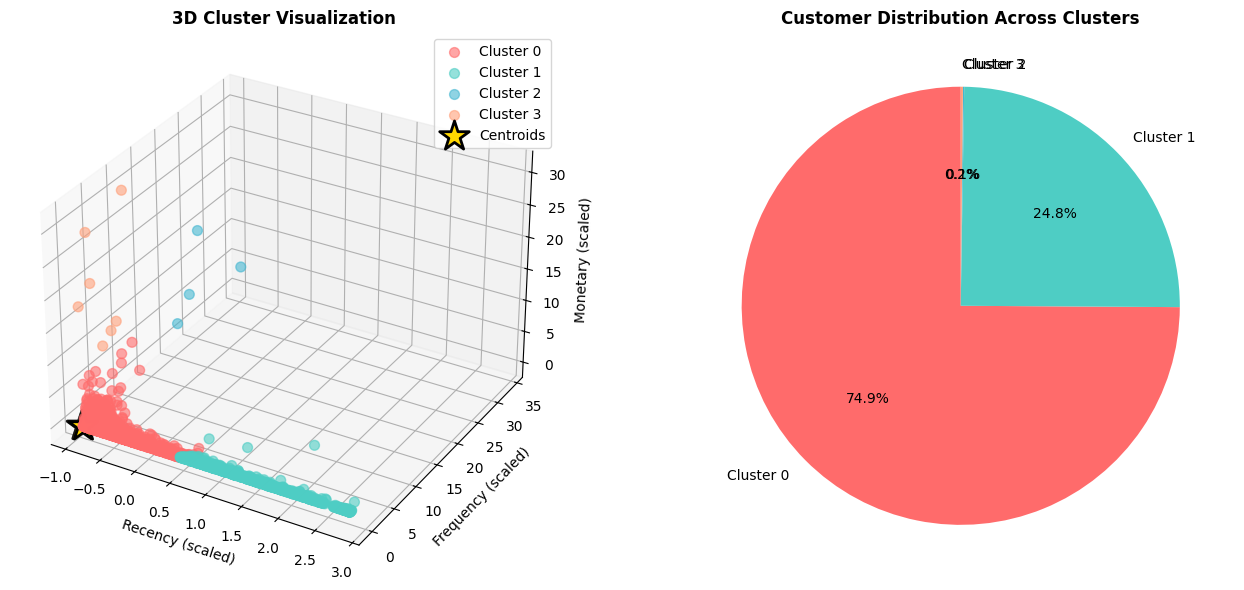

In [15]:
# STEP 6: VISUALIZE CLUSTERS
# ===========================

# 3D Scatter Plot (using original scaled features)
fig = plt.figure(figsize=(14, 6))

# 3D scatter plot
ax1 = fig.add_subplot(121, projection='3d')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
for cluster_id in sorted(rfm['Cluster'].unique()):
    cluster_data = X_scaled[rfm['Cluster'] == cluster_id]
    ax1.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], 
               label=f'Cluster {cluster_id}', alpha=0.6, s=50, color=colors[cluster_id] if cluster_id < len(colors) else '#808080')

# Plot cluster centers
centers_scaled = scaler.transform(kmeans_final.cluster_centers_)
ax1.scatter(centers_scaled[:, 0], centers_scaled[:, 1], centers_scaled[:, 2], 
           marker='*', s=500, c='gold', edgecolors='black', linewidth=2, label='Centroids')

ax1.set_xlabel('Recency (scaled)', fontsize=10)
ax1.set_ylabel('Frequency (scaled)', fontsize=10)
ax1.set_zlabel('Monetary (scaled)', fontsize=10)
ax1.set_title('3D Cluster Visualization', fontsize=12, fontweight='bold')
ax1.legend()

# Cluster Distribution Pie Chart
ax2 = fig.add_subplot(122)
cluster_counts = rfm['Cluster'].value_counts().sort_index()
ax2.pie(cluster_counts, labels=[f'Cluster {i}' for i in range(optimal_k)], 
        autopct='%1.1f%%', colors=colors[:optimal_k], startangle=90)
ax2.set_title('Customer Distribution Across Clusters', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

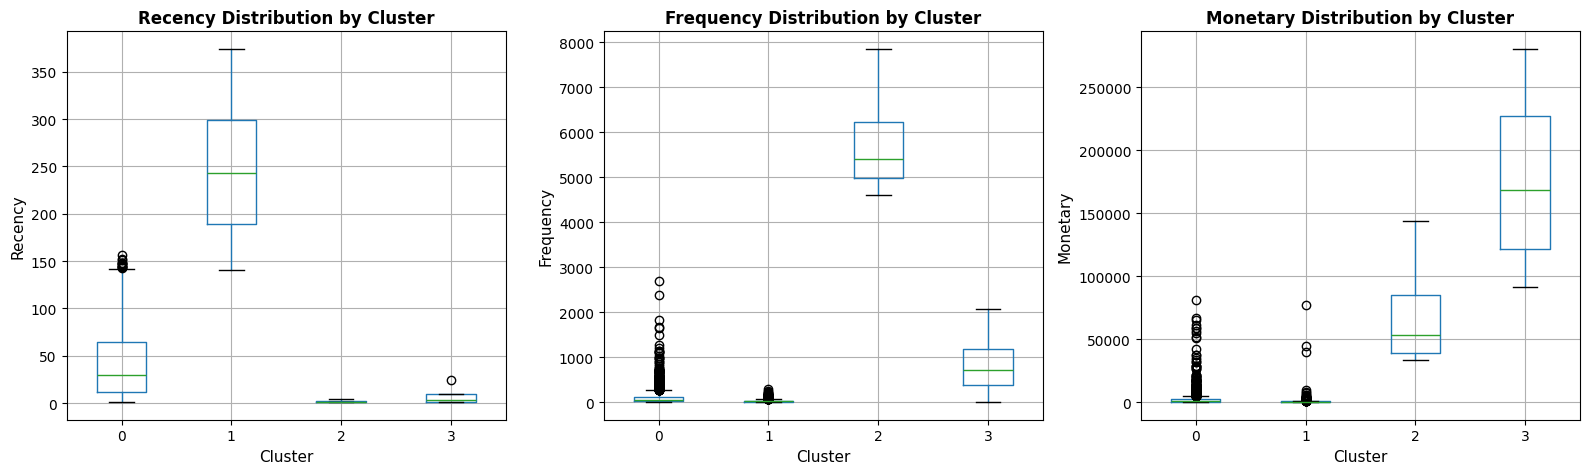


Cluster Characteristics (Normalized for heatmap):


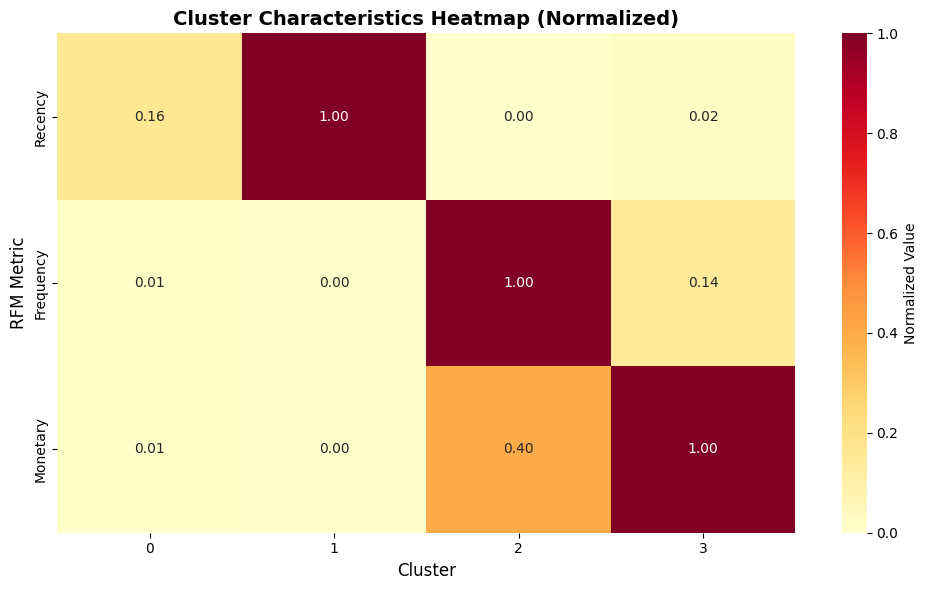

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ['Recency', 'Frequency', 'Monetary']
colors_list = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    rfm.boxplot(column=metric, by='Cluster', ax=ax)
    ax.set_title(f'{metric} Distribution by Cluster', fontsize=12, fontweight='bold')
    ax.set_xlabel('Cluster', fontsize=11)
    ax.set_ylabel(metric, fontsize=11)
    ax.get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Heatmap of cluster characteristics
print("\nCluster Characteristics (Normalized for heatmap):")
cluster_means = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_means_normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_normalized.T, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Normalized Value'})
plt.title('Cluster Characteristics Heatmap (Normalized)', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('RFM Metric', fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
# STEP 7: CUSTOMER SEGMENT INTERPRETATION & BUSINESS INSIGHTS
# =============================================================

print(f"\n{'='*80}")
print("CUSTOMER SEGMENTATION INTERPRETATION")
print(f"{'='*80}\n")

segment_labels = {
    0: "CHAMPIONS",
    1: "LOYAL CUSTOMERS", 
    2: "AT RISK CUSTOMERS",
    3: "POTENTIAL CUSTOMERS"
}

# Rank clusters by value (Monetary)
cluster_ranking = rfm.groupby('Cluster')['Monetary'].mean().sort_values(ascending=False)

for rank, (cluster_id, monetary_value) in enumerate(cluster_ranking.items(), 1):
    cluster_data = rfm[rfm['Cluster'] == cluster_id]
    
    avg_recency = cluster_data['Recency'].mean()
    avg_frequency = cluster_data['Frequency'].mean()
    avg_monetary = cluster_data['Monetary'].mean()
    
    print(f"{'─'*80}")
    print(f"CLUSTER {cluster_id} - Segment: {segment_labels.get(cluster_id, 'GENERAL')}")
    print(f"{'─'*80}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(rfm)*100:.1f}%)")
    print(f"Avg Recency: {avg_recency:.1f} days (lower = more recent)")
    print(f"Avg Frequency: {avg_frequency:.1f} purchases")
    print(f"Avg Monetary: £{avg_monetary:.2f} total spent")
    
    # Interpretation
    if avg_recency < 100 and avg_frequency > 10 and avg_monetary > 1000:
        interpretation = "💎 HIGH VALUE: Recently active, frequent buyers with high spend. PRIORITY: Retain & Reward"
    elif avg_recency < 200 and avg_frequency > 5:
        interpretation = "⭐ LOYAL: Consistent purchasers. PRIORITY: Delight & Cross-sell"
    elif avg_recency > 300 and avg_frequency < 5:
        interpretation = "⚠️ AT RISK: Dormant customers. PRIORITY: Win-back campaigns"
    else:
        interpretation = "🎯 POTENTIAL: Emerging customers. PRIORITY: Nurture & Develop"
    
    print(f"Interpretation: {interpretation}")
    print()

# Export results
print(f"\n{'='*80}")
print("EXPORTING RESULTS")
print(f"{'='*80}\n")

# Add cluster assignments back to original RFM data
rfm_with_clusters = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']].copy()
rfm_with_clusters['Segment'] = rfm_with_clusters['Cluster'].map(segment_labels)

print("Sample of segmented customers:")
print(rfm_with_clusters.head(10))

# Optionally save to CSV
# rfm_with_clusters.to_csv('customer_segments.csv', index=False)
# print("\n✓ Results exported to 'customer_segments.csv'")


CUSTOMER SEGMENTATION INTERPRETATION

────────────────────────────────────────────────────────────────────────────────
CLUSTER 3 - Segment: POTENTIAL CUSTOMERS
────────────────────────────────────────────────────────────────────────────────
Size: 7 customers (0.2%)
Avg Recency: 7.0 days (lower = more recent)
Avg Frequency: 847.1 purchases
Avg Monetary: £176606.16 total spent
Interpretation: 💎 HIGH VALUE: Recently active, frequent buyers with high spend. PRIORITY: Retain & Reward

────────────────────────────────────────────────────────────────────────────────
CLUSTER 2 - Segment: AT RISK CUSTOMERS
────────────────────────────────────────────────────────────────────────────────
Size: 4 customers (0.1%)
Avg Recency: 2.0 days (lower = more recent)
Avg Frequency: 5807.8 purchases
Avg Monetary: £70925.29 total spent
Interpretation: 💎 HIGH VALUE: Recently active, frequent buyers with high spend. PRIORITY: Retain & Reward

─────────────────────────────────────────────────────────────────────


SALES TREND ANALYSIS

Monthly Sales Summary (Last 10 months):
   YearMonth  Transactions  Quantity      Revenue  Customers
3    2011-03          1321    348544   595500.760        974
4    2011-04          1149    292225   469200.361        856
5    2011-05          1555    373685   678594.560       1056
6    2011-06          1393    363699   661213.690        991
7    2011-07          1331    369432   600091.011        949
8    2011-08          1281    398938   645343.900        935
9    2011-09          1756    544899   952838.382       1266
10   2011-10          1929    593908  1039318.790       1364
11   2011-11          2658    681888  1161817.380       1665
12   2011-12           778    287413   518192.790        615


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10752\2656029317.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(dow_sales.index, rotation=45)


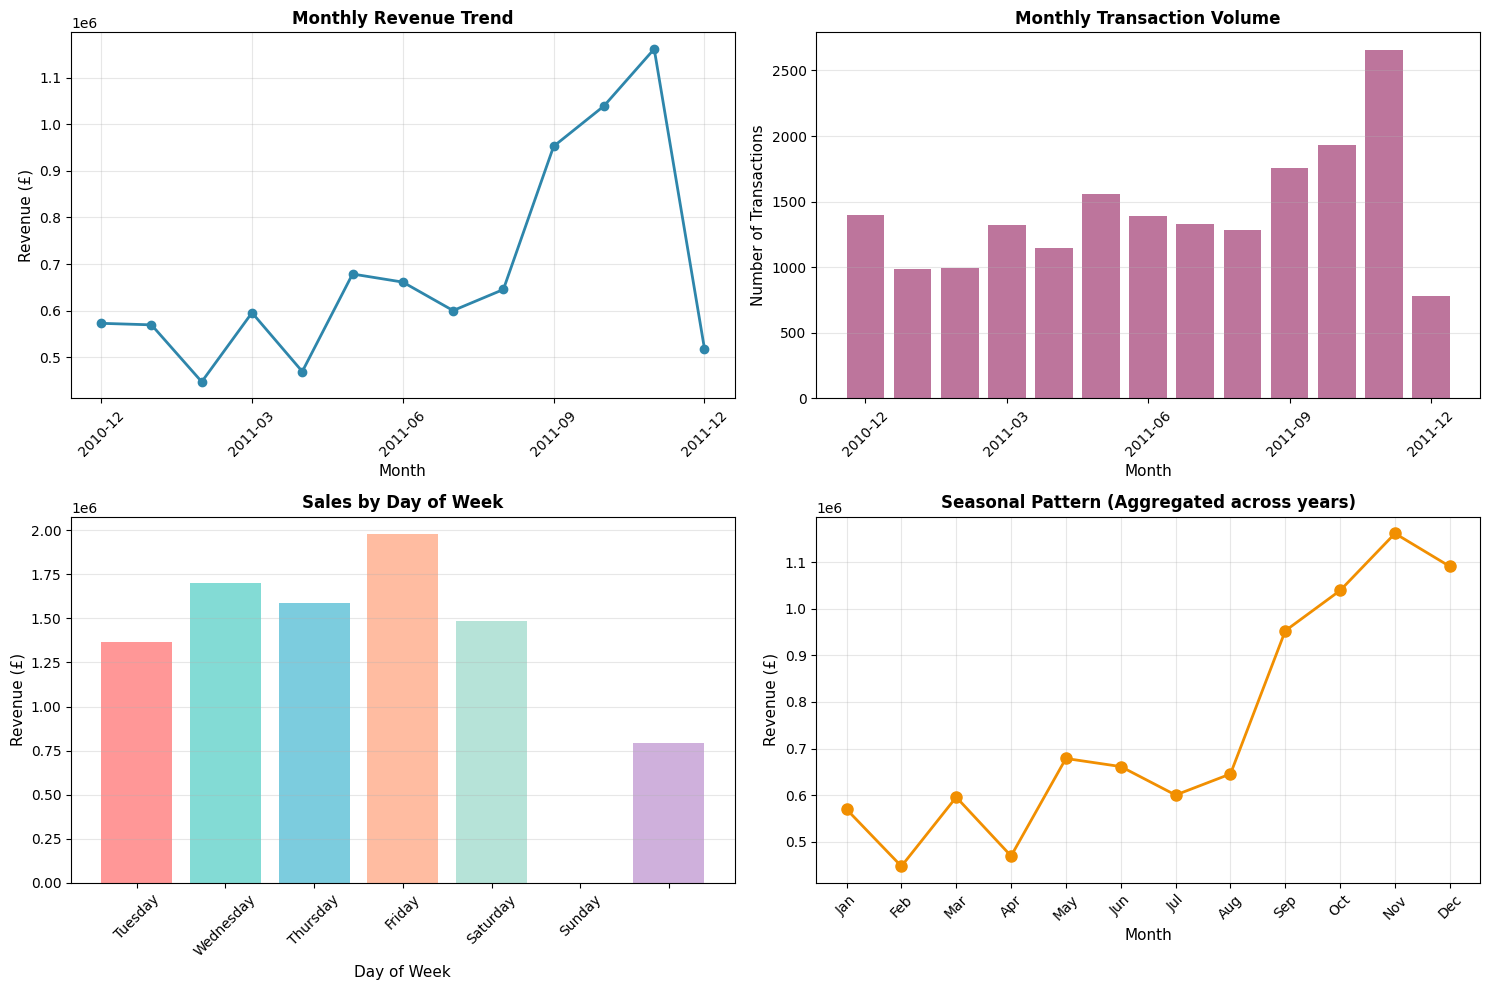


📈 SALES TREND INSIGHTS:
   Average Monthly Revenue: £685,492.92
   Peak Month: 2011-11 - £1,161,817.38
   Low Month: 2011-02 - £447,137.35
   Revenue Growth Rate: -9.52%

   Peak Sales Day: Thursday - £1,976,859.07

✓ Sales Trend Analysis Complete


In [18]:
# ====================================================================================
# SECTION 4: SALES TREND ANALYSIS
# Analyze sales over time to identify patterns and trends
# ====================================================================================

print("\n" + "="*80)
print("SALES TREND ANALYSIS")
print("="*80)

# Prepare time-based data
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Date'] = df['InvoiceDate'].dt.date
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Monthly sales trend
monthly_sales = df.groupby('YearMonth').agg({
    'InvoiceID': 'nunique',
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'CustomerID': 'nunique'
}).reset_index()
monthly_sales.columns = ['YearMonth', 'Transactions', 'Quantity', 'Revenue', 'Customers']
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

print("\nMonthly Sales Summary (Last 10 months):")
print(monthly_sales.tail(10))

# Visualize sales trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Revenue trend
ax1 = axes[0, 0]
ax1.plot(range(len(monthly_sales)), monthly_sales['Revenue'], marker='o', linewidth=2, markersize=6, color='#2E86AB')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Revenue (£)', fontsize=11)
ax1.set_title('Monthly Revenue Trend', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, len(monthly_sales), 3))
ax1.set_xticklabels(monthly_sales['YearMonth'].iloc[::3], rotation=45)

# Transaction volume
ax2 = axes[0, 1]
ax2.bar(range(len(monthly_sales)), monthly_sales['Transactions'], color='#A23B72', alpha=0.7)
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('Number of Transactions', fontsize=11)
ax2.set_title('Monthly Transaction Volume', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(range(0, len(monthly_sales), 3))
ax2.set_xticklabels(monthly_sales['YearMonth'].iloc[::3], rotation=45)

# Day of week analysis
ax3 = axes[1, 0]
dow_sales = df.groupby('DayOfWeek')['TotalAmount'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
colors_dow = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
ax3.bar(range(len(dow_sales)), dow_sales.values, color=colors_dow, alpha=0.7)
ax3.set_xlabel('Day of Week', fontsize=11)
ax3.set_ylabel('Revenue (£)', fontsize=11)
ax3.set_title('Sales by Day of Week', fontsize=12, fontweight='bold')
ax3.set_xticklabels(dow_sales.index, rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Monthly seasonality
ax4 = axes[1, 1]
monthly_pattern = df.groupby('Month')['TotalAmount'].sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax4.plot(monthly_pattern.index, monthly_pattern.values, marker='o', linewidth=2, markersize=8, color='#F18F01')
ax4.set_xlabel('Month', fontsize=11)
ax4.set_ylabel('Revenue (£)', fontsize=11)
ax4.set_title('Seasonal Pattern (Aggregated across years)', fontsize=12, fontweight='bold')
ax4.set_xticks(range(1, 13))
ax4.set_xticklabels(months, rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Trend summary
avg_revenue = monthly_sales['Revenue'].mean()
peak_month = monthly_sales.loc[monthly_sales['Revenue'].idxmax()]
low_month = monthly_sales.loc[monthly_sales['Revenue'].idxmin()]

print(f"\n📈 SALES TREND INSIGHTS:")
print(f"   Average Monthly Revenue: £{avg_revenue:,.2f}")
print(f"   Peak Month: {peak_month['YearMonth']} - £{peak_month['Revenue']:,.2f}")
print(f"   Low Month: {low_month['YearMonth']} - £{low_month['Revenue']:,.2f}")
print(f"   Revenue Growth Rate: {((monthly_sales['Revenue'].iloc[-1] - monthly_sales['Revenue'].iloc[0]) / monthly_sales['Revenue'].iloc[0] * 100):.2f}%")

# Peak days
peak_day = df.groupby('DayOfWeek')['TotalAmount'].sum()
print(f"\n   Peak Sales Day: {peak_day.idxmax()} - £{peak_day.max():,.2f}")

print(f"\n✓ Sales Trend Analysis Complete")



PRODUCT PERFORMANCE ANALYSIS

🏆 TOP 10 BEST-SELLING PRODUCTS:
                       ProductName  Total_Quantity   Revenue  Unique_Customers  Transactions
       PAPER CRAFT , LITTLE BIRDIE           80995 168469.60                 1             1
          REGENCY CAKESTAND 3 TIER           12412 142592.95               881          1724
WHITE HANGING HEART T-LIGHT HOLDER           36725 100448.15               856          2028
           JUMBO BAG RED RETROSPOT           46181  85220.78               635          1618
    MEDIUM CERAMIC TOP STORAGE JAR           77916  81416.73               138           198
                           POSTAGE            3120  77803.96               331          1099
                     PARTY BUNTING           15295  68844.33               708          1397
     ASSORTED COLOUR BIRD ORNAMENT           35362  56580.34               678          1408
                            Manual            7179  53779.93               201           290
       

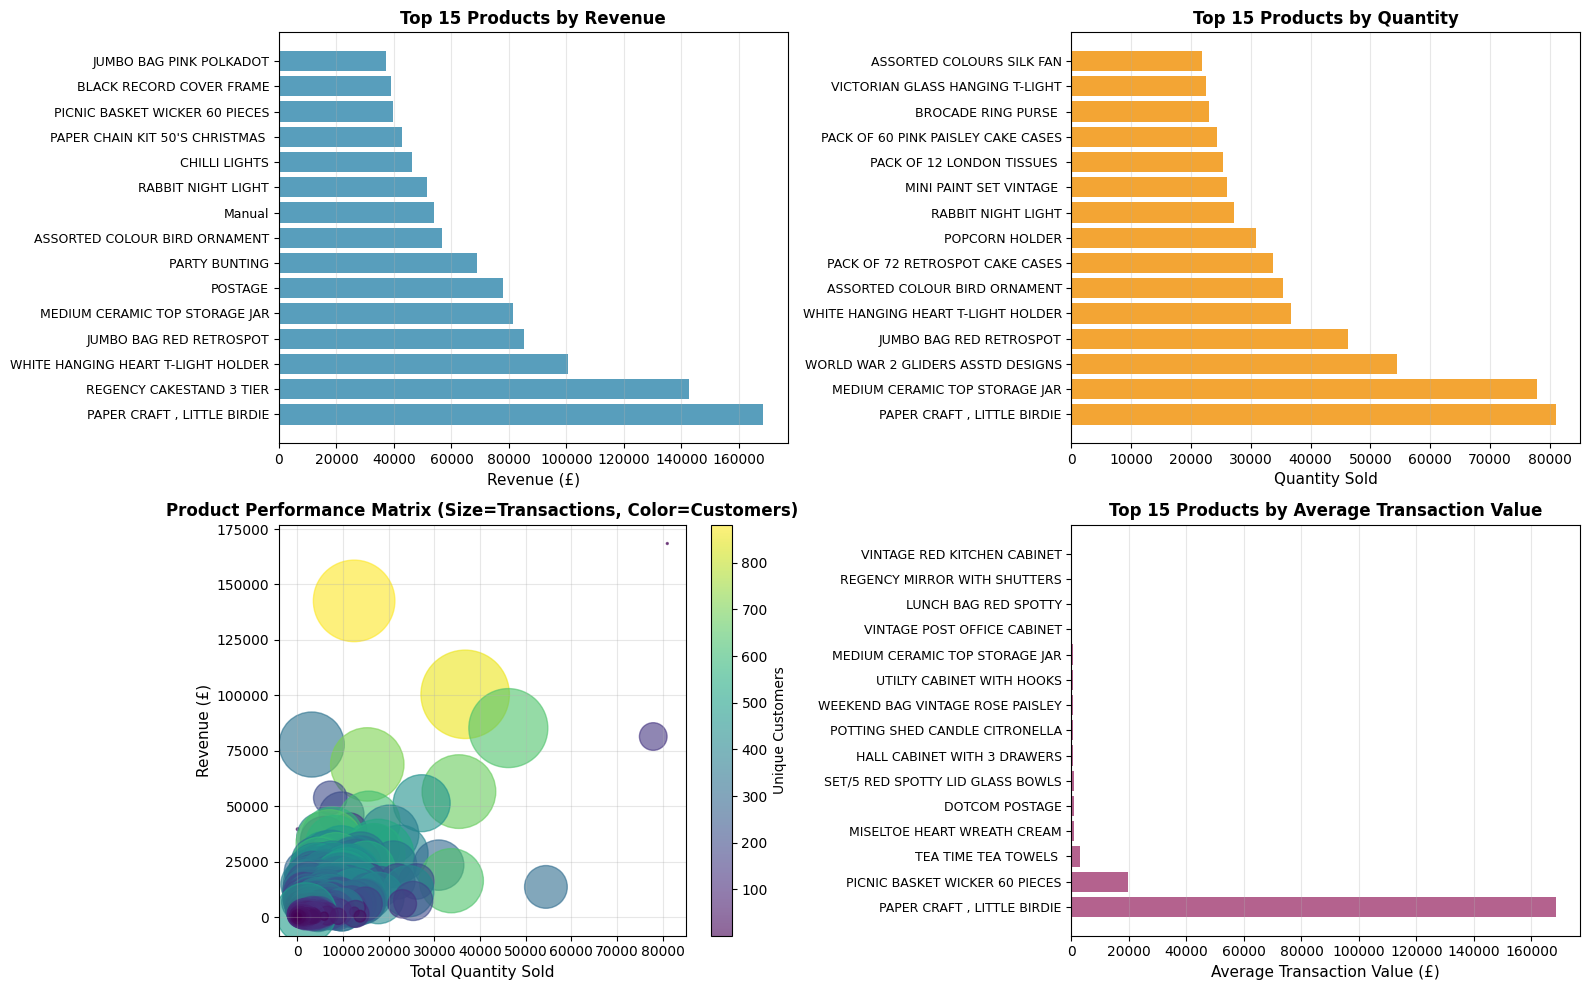


📊 PRODUCT PERFORMANCE STATISTICS:
   Total Unique Products: 3877
   Average Products per Transaction: 0.21
   Top Product Revenue: £168,469.60
   Average Product Revenue: £2,298.53
   Median Product Revenue: £585.00

✓ Product Performance Analysis Complete


In [19]:
# ====================================================================================
# SECTION 5: PRODUCT PERFORMANCE ANALYSIS
# Identify best-sellers and underperforming items
# ====================================================================================

print("\n" + "="*80)
print("PRODUCT PERFORMANCE ANALYSIS")
print("="*80)

# Product performance metrics
product_stats = df.groupby('ProductName').agg({
    'Quantity': ['sum', 'mean', 'count'],
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'UnitPrice': 'first'
}).reset_index()

product_stats.columns = ['ProductName', 'Total_Quantity', 'Avg_Quantity', 'Transactions', 'Revenue', 'Unique_Customers', 'Price']
product_stats = product_stats.sort_values('Revenue', ascending=False)
product_stats['Avg_Transaction_Value'] = product_stats['Revenue'] / product_stats['Transactions']

# Top and bottom products
print("\n🏆 TOP 10 BEST-SELLING PRODUCTS:")
print(product_stats.head(10)[['ProductName', 'Total_Quantity', 'Revenue', 'Unique_Customers', 'Transactions']].to_string(index=False))

print("\n⚠️ BOTTOM 10 UNDERPERFORMING PRODUCTS:")
print(product_stats.tail(10)[['ProductName', 'Total_Quantity', 'Revenue', 'Unique_Customers']].to_string(index=False))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Top 15 products by revenue
ax1 = axes[0, 0]
top_products_revenue = product_stats.head(15)
ax1.barh(range(len(top_products_revenue)), top_products_revenue['Revenue'], color='#2E86AB', alpha=0.8)
ax1.set_yticks(range(len(top_products_revenue)))
ax1.set_yticklabels(top_products_revenue['ProductName'], fontsize=9)
ax1.set_xlabel('Revenue (£)', fontsize=11)
ax1.set_title('Top 15 Products by Revenue', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Top 15 products by quantity
ax2 = axes[0, 1]
top_products_qty = product_stats.nlargest(15, 'Total_Quantity')
ax2.barh(range(len(top_products_qty)), top_products_qty['Total_Quantity'], color='#F18F01', alpha=0.8)
ax2.set_yticks(range(len(top_products_qty)))
ax2.set_yticklabels(top_products_qty['ProductName'], fontsize=9)
ax2.set_xlabel('Quantity Sold', fontsize=11)
ax2.set_title('Top 15 Products by Quantity', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Revenue vs Quantity scatter (identify different types of products)
ax3 = axes[1, 0]
scatter = ax3.scatter(product_stats['Total_Quantity'], product_stats['Revenue'], 
                      s=product_stats['Transactions']*2, alpha=0.6, c=product_stats['Unique_Customers'], 
                      cmap='viridis')
ax3.set_xlabel('Total Quantity Sold', fontsize=11)
ax3.set_ylabel('Revenue (£)', fontsize=11)
ax3.set_title('Product Performance Matrix (Size=Transactions, Color=Customers)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Unique Customers')

# Product profitability (Average Transaction Value)
ax4 = axes[1, 1]
profit_products = product_stats.nlargest(15, 'Avg_Transaction_Value')
ax4.barh(range(len(profit_products)), profit_products['Avg_Transaction_Value'], color='#A23B72', alpha=0.8)
ax4.set_yticks(range(len(profit_products)))
ax4.set_yticklabels(profit_products['ProductName'], fontsize=9)
ax4.set_xlabel('Average Transaction Value (£)', fontsize=11)
ax4.set_title('Top 15 Products by Average Transaction Value', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n📊 PRODUCT PERFORMANCE STATISTICS:")
print(f"   Total Unique Products: {len(product_stats)}")
print(f"   Average Products per Transaction: {df['ProductName'].nunique() / df['InvoiceID'].nunique():.2f}")
print(f"   Top Product Revenue: £{product_stats.iloc[0]['Revenue']:,.2f}")
print(f"   Average Product Revenue: £{product_stats['Revenue'].mean():,.2f}")
print(f"   Median Product Revenue: £{product_stats['Revenue'].median():,.2f}")

print(f"\n✓ Product Performance Analysis Complete")



GEOGRAPHIC ANALYSIS

🌍 TOP 15 COUNTRIES BY REVENUE:
       Country     Revenue  Unique_Customers  Transactions  Avg_Customer_Value
United Kingdom 7308391.554              3921         16649         1863.910113
   Netherlands  285446.340                 9            95        31716.260000
          EIRE  265545.900                 3           260        88515.300000
       Germany  228867.140                94           457         2434.756809
        France  209024.050                87           389         2402.575287
     Australia  138521.310                 9            57        15391.256667
         Spain   61577.110                30            90         2052.570333
   Switzerland   56443.950                21            51         2687.807143
       Belgium   41196.340                25            98         1647.853600
        Sweden   38378.330                 8            36         4797.291250
         Japan   37416.370                 8            19         4677.046250

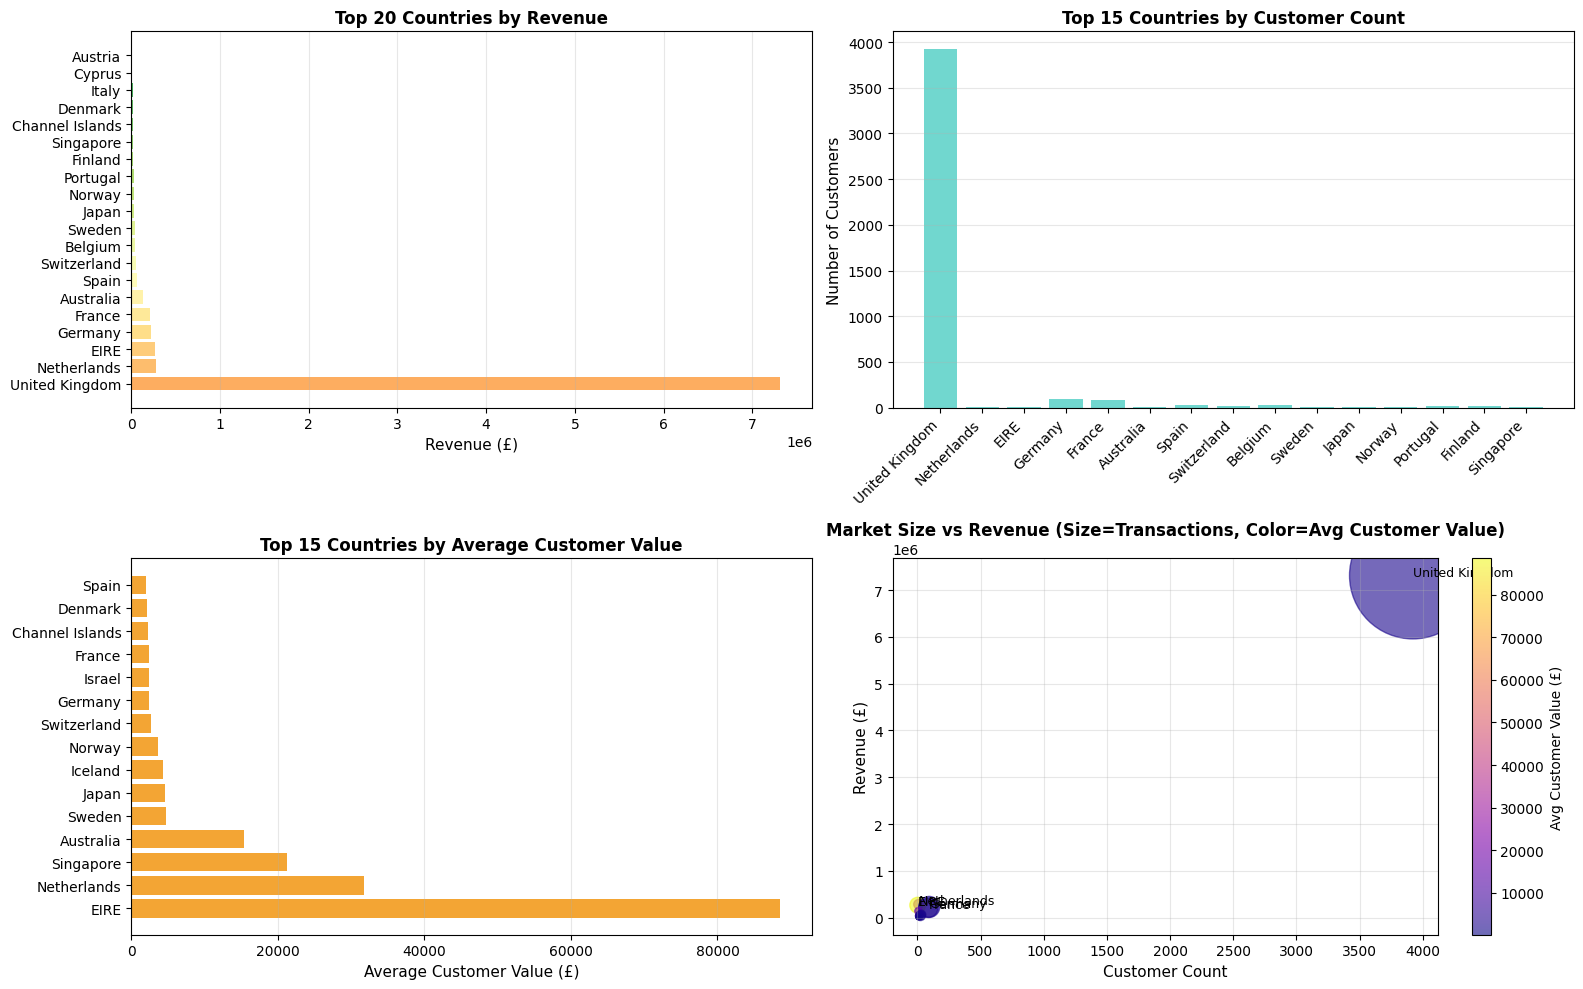


📍 GEOGRAPHIC INSIGHTS:
   Total Countries: 37
   Top Country Revenue: £7,308,391.55 (United Kingdom)
   Top 5 Countries: United Kingdom, Netherlands, EIRE, Germany, France
   Revenue Concentration (Top 5): 93.1%
   Least developed market: Saudi Arabia - £145.92

💡 MARKET EXPANSION OPPORTUNITIES:
   Countries with many customers but lower revenue (expansion potential):
      - Austria: 11 customers, £10,198.68 revenue

✓ Geographic Analysis Complete


In [20]:
# ====================================================================================
# SECTION 6: GEOGRAPHIC ANALYSIS
# Analyze sales by country and identify high-performing regions
# ====================================================================================

print("\n" + "="*80)
print("GEOGRAPHIC ANALYSIS")
print("="*80)

# Country-level analysis
country_stats = df.groupby('Country').agg({
    'InvoiceID': 'nunique',
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'UnitPrice': 'mean'
}).reset_index()

country_stats.columns = ['Country', 'Transactions', 'Quantity', 'Revenue', 'Unique_Customers', 'Avg_Price']
country_stats['Avg_Customer_Value'] = country_stats['Revenue'] / country_stats['Unique_Customers']
country_stats['Avg_Transaction_Value'] = country_stats['Revenue'] / country_stats['Transactions']
country_stats = country_stats.sort_values('Revenue', ascending=False)

print("\n🌍 TOP 15 COUNTRIES BY REVENUE:")
print(country_stats.head(15)[['Country', 'Revenue', 'Unique_Customers', 'Transactions', 'Avg_Customer_Value']].to_string(index=False))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Top 20 countries by revenue
ax1 = axes[0, 0]
top_countries_plot = country_stats.head(20)
colors_revenue = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_countries_plot)))
ax1.barh(range(len(top_countries_plot)), top_countries_plot['Revenue'], color=colors_revenue)
ax1.set_yticks(range(len(top_countries_plot)))
ax1.set_yticklabels(top_countries_plot['Country'], fontsize=10)
ax1.set_xlabel('Revenue (£)', fontsize=11)
ax1.set_title('Top 20 Countries by Revenue', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Customer count by country
ax2 = axes[0, 1]
top_countries_cust = country_stats.head(15)
ax2.bar(range(len(top_countries_cust)), top_countries_cust['Unique_Customers'], color='#4ECDC4', alpha=0.8)
ax2.set_xticks(range(len(top_countries_cust)))
ax2.set_xticklabels(top_countries_cust['Country'], rotation=45, ha='right', fontsize=10)
ax2.set_ylabel('Number of Customers', fontsize=11)
ax2.set_title('Top 15 Countries by Customer Count', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Average customer value by country
ax3 = axes[1, 0]
high_value_countries = country_stats.nlargest(15, 'Avg_Customer_Value')
ax3.barh(range(len(high_value_countries)), high_value_countries['Avg_Customer_Value'], color='#F18F01', alpha=0.8)
ax3.set_yticks(range(len(high_value_countries)))
ax3.set_yticklabels(high_value_countries['Country'], fontsize=10)
ax3.set_xlabel('Average Customer Value (£)', fontsize=11)
ax3.set_title('Top 15 Countries by Average Customer Value', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Region analysis - Market Penetration (Revenue vs Customer Count)
ax4 = axes[1, 1]
scatter_countries = ax4.scatter(country_stats['Unique_Customers'], country_stats['Revenue'], 
                               s=country_stats['Transactions']/2, alpha=0.6, c=country_stats['Avg_Customer_Value'], 
                               cmap='plasma')
ax4.set_xlabel('Customer Count', fontsize=11)
ax4.set_ylabel('Revenue (£)', fontsize=11)
ax4.set_title('Market Size vs Revenue (Size=Transactions, Color=Avg Customer Value)', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Annotate top countries
for idx, row in country_stats.head(5).iterrows():
    ax4.annotate(row['Country'], (row['Unique_Customers'], row['Revenue']), fontsize=9)

plt.colorbar(scatter_countries, ax=ax4, label='Avg Customer Value (£)')
plt.tight_layout()
plt.show()

# Geographic insights
print(f"\n📍 GEOGRAPHIC INSIGHTS:")
print(f"   Total Countries: {len(country_stats)}")
print(f"   Top Country Revenue: £{country_stats.iloc[0]['Revenue']:,.2f} ({country_stats.iloc[0]['Country']})")
print(f"   Top 5 Countries: {', '.join(country_stats.head(5)['Country'].tolist())}")
print(f"   Revenue Concentration (Top 5): {country_stats.head(5)['Revenue'].sum() / country_stats['Revenue'].sum() * 100:.1f}%")
print(f"   Least developed market: {country_stats.iloc[-1]['Country']} - £{country_stats.iloc[-1]['Revenue']:,.2f}")

# Market growth potential
print(f"\n💡 MARKET EXPANSION OPPORTUNITIES:")
high_customer_low_revenue = country_stats[(country_stats['Unique_Customers'] > country_stats['Unique_Customers'].quantile(0.5)) & 
                                          (country_stats['Revenue'] < country_stats['Revenue'].quantile(0.5))]
if len(high_customer_low_revenue) > 0:
    print("   Countries with many customers but lower revenue (expansion potential):")
    for idx, row in high_customer_low_revenue.head(5).iterrows():
        print(f"      - {row['Country']}: {row['Unique_Customers']:.0f} customers, £{row['Revenue']:,.2f} revenue")

print(f"\n✓ Geographic Analysis Complete")

In [21]:
# Import all required libraries
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# ====================================================================================
# SECTION 7: BASKET ANALYSIS
# Analyze product combinations frequently purchased together
# ====================================================================================

print("\n" + "="*80)
print("BASKET ANALYSIS - MARKET BASKET ANALYSIS")
print("="*80)

# Create transaction-product matrix
transaction_products = df.groupby('InvoiceID')['ProductName'].apply(list).reset_index()
print(f"\nTotal Transactions: {len(transaction_products)}")
print(f"Average Products per Transaction: {transaction_products['ProductName'].apply(len).mean():.2f}")
print(f"Max Products in Single Transaction: {transaction_products['ProductName'].apply(len).max()}")

# Find frequently co-purchased products
product_pairs = []
product_frequencies = Counter()

for products in transaction_products['ProductName']:
    product_frequencies.update(products)
    if len(products) > 1:
        pairs = list(combinations(sorted(set(products)), 2))
        product_pairs.extend(pairs)

# Count product pair frequencies
pair_counts = Counter(product_pairs)
most_common_pairs = pair_counts.most_common(20)
print("\n🔗 TOP 20 MOST FREQUENTLY CO-PURCHASED PRODUCT PAIRS:")
for pair, count in most_common_pairs:
    print(f"   {pair[0]} + {pair[1]}: {count} transactions")
# Visualize top product pairs
pair_df = pd.DataFrame(most_common_pairs, columns=['Product_Pair', 'Count'])
pair_df[['Product1', 'Product2']] = pd.DataFrame(pair_df['Product_Pair'].tolist(), index=pair_df.index)



BASKET ANALYSIS - MARKET BASKET ANALYSIS

Total Transactions: 18536
Average Products per Transaction: 21.47
Max Products in Single Transaction: 542

🔗 TOP 20 MOST FREQUENTLY CO-PURCHASED PRODUCT PAIRS:
   JUMBO BAG PINK POLKADOT + JUMBO BAG RED RETROSPOT: 546 transactions
   GREEN REGENCY TEACUP AND SAUCER + ROSES REGENCY TEACUP AND SAUCER : 541 transactions
   ALARM CLOCK BAKELIKE GREEN + ALARM CLOCK BAKELIKE RED : 530 transactions
   LUNCH BAG PINK POLKADOT + LUNCH BAG RED RETROSPOT: 523 transactions
   LUNCH BAG  BLACK SKULL. + LUNCH BAG RED RETROSPOT: 517 transactions
   WOODEN FRAME ANTIQUE WHITE  + WOODEN PICTURE FRAME WHITE FINISH: 468 transactions
   LUNCH BAG RED RETROSPOT + LUNCH BAG SPACEBOY DESIGN : 467 transactions
   LUNCH BAG  BLACK SKULL. + LUNCH BAG PINK POLKADOT: 464 transactions
   GARDENERS KNEELING PAD CUP OF TEA  + GARDENERS KNEELING PAD KEEP CALM : 463 transactions
   GREEN REGENCY TEACUP AND SAUCER + PINK REGENCY TEACUP AND SAUCER: 460 transactions
   LUNCH BAG